# 1. Mounting Google Drive



In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# 2. Read Available GPU

In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print("Num GPU available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices('GPU'))
print(device_lib.list_local_devices())

Num GPU available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7483542350706677017
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14465892352
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11754130317670392535
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


# 3. Read Dataset from GDrive

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout
from datetime import datetime

batch_size = 300
width = 224
height = 224
nama = "venturi"
data_dir = "/gdrive/MyDrive/SMS6-Deep_Learning/Week_9/Coding/Data/flowers"

Binary Classification

In [ ]:
train_ds = image_dataset_from_directory(
    data_dir+"/train",
    validation_split = 0.2,
    subset = 'training',
    seed = 50,
    image_size = (width, height),
    batch_size = batch_size,
    label_mode = 'binary'
)

val_ds = image_dataset_from_directory(
    data_dir+"/train",
    validation_split = 0.2,
    subset = 'validation',
    seed = 50,
    image_size = (width, height),
    batch_size = batch_size,
    label_mode = 'binary'
)

Multi Classification

In [ ]:
train_ds = image_dataset_from_directory(
    data_dir+"/train",
    validation_split = 0.2,
    subset = 'training',
    seed = 50,
    image_size = (width, height),
    batch_size = batch_size,
    label_mode = 'categorical'
)

val_ds = image_dataset_from_directory(
    data_dir+"/train",
    validation_split = 0.2,
    subset = 'validation',
    seed = 50,
    image_size = (width, height),
    batch_size = batch_size,
    label_mode = 'categorical'
)

Found 4318 files belonging to 5 classes.
Using 3455 files for training.
Found 4318 files belonging to 5 classes.
Using 863 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)
# Wajib di run sampai sini

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


TypeError: ignored

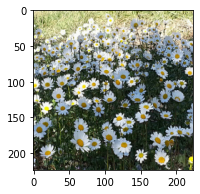

In [ ]:
# Displaying Datasets
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(class_names[labels[i]]))
        plt.axis("off")

In [ ]:
for image_batch, label_batch in train_ds:
    print(image_batch.shape)
    print(label_batch.shape)
    break

(300, 224, 224, 3)
(300, 5)


# 4. Building Model

In [ ]:
def BinaryModel(input_shape, num_classes):
    assert len(input_shape) == 3

    # Input layer
    x_input = Input(shape = input_shape)

    # Normalisasi layer
    x = tf.keras.layers.Rescaling(1./255)(x_input)
    
    # Layer 1
    x = Conv2D(16, (11, 11), strides= (4, 4), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(2, strides = 2)(x)

    # Layer 2
    x = Conv2D(20, (3, 3), strides= (1, 1), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(2, strides = 2)(x)

    # Layer 3
    x = Conv2D(30, (3, 3), strides= (1, 1), padding='same', activation='relu')(x)

    # Layer 4
    x = Conv2D(60, (3, 3), strides= (1, 1), padding='same', activation='relu')(x)

    # Layer 5
    x = Conv2D(60, (3, 3), strides= (1, 1), padding='same', activation='relu')(x)
    x = MaxPooling2D(2, strides = 2)(x)

    # Flatten
    x = Flatten()(x)

    # Fully Connected Layer 1
    x = Dense(50, activation='relu')(x)
    x = Dropout(0.1)(x)

    # Fully Connected Layer 2 
    x = Dense(500, activation='relu')(x)

    # Output Layer
    x = Dense(1, activation = 'sigmoid')(x)

    model = tf.keras.models.Model(inputs = x_input, outputs = x)
    model.compile(
      optimizer = 'adam',
      loss = 'binary_crossentropy',
      metrics = ['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()]
    )

    return model


In [ ]:
def MulticlassModel(input_shape, num_classes):
    assert len(input_shape) == 3

    # Input layer
    x_input = Input(shape = input_shape)

    # Normalisasi layer
    x = tf.keras.layers.Rescaling(1./255)(x_input)
    
    # Layer 1
    x = Conv2D(16, (11, 11), strides= (4, 4), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(2, strides = 2)(x)

    # Layer 2
    x = Conv2D(32, (3, 3), strides= (2, 2), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(2, strides = 2)(x)

    # Layer 3
    x = Conv2D(64, (3, 3), strides= (1, 1), padding='same', activation='relu')(x)

    # Layer 4
    x = Conv2D(128, (3, 3), strides= (1, 1), padding='same', activation='relu')(x)

    # Layer 5
#     x = Conv2D(384, (3, 3), strides= (1, 1), padding='same', activation='relu')(x)
#     x = MaxPooling2D(2, strides = 2)(x)

    # Flatten
    x = Flatten()(x)

    # Fully Connected Layer 1
    x = Dense(200, activation='relu')(x)
    x = Dropout(.2)(x)

    # Fully Connected Layer 2 
    x = Dense(100, activation='relu')(x)
    x = Dropout(.2)(x)

    # Output Layer
    x = Dense(num_classes, activation = 'softmax')(x)

    model = tf.keras.models.Model(inputs = x_input, outputs = x)
    model.compile(
      optimizer = 'adam',
      loss = 'categorical_crossentropy',
      metrics = ['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()]
    )

    return model


In [59]:
# Model Awal + Venturi Model Architecture
def MulticlassModel(input_shape, num_classes):
    assert len(input_shape) == 3

    # Input layer
    x_input = Input(shape = input_shape)

    # Normalisasi layer
    x = tf.keras.layers.Rescaling(1./255)(x_input)
    
    # Layer 1
    x = Conv2D(16, (11, 11), strides= (4, 4), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(2, strides = 2)(x)

    # Layer 2
    x = Conv2D(32, (3, 3), strides= (2, 2), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(2, strides = 2)(x)

    # Layer 3
    x = Conv2D(64, (3, 3), strides= (1, 1), padding='same', activation='relu')(x)

    # Layer 4
    x = Conv2D(128, (3, 3), strides= (1, 1), padding='same', activation='relu')(x)

    # Layer 5
#     x = Conv2D(384, (3, 3), strides= (1, 1), padding='same', activation='relu')(x)
#     x = MaxPooling2D(2, strides = 2)(x)

    # Flatten
    x = Flatten()(x)

    # Fully Connected Layer 1
    x = Dense(64, activation='relu')(x)

    # Fully Connected Layer 2 
    x = Dense(48, activation='relu')(x)

    # Fully Connected Layer 3
    x = Dense(32, activation='relu')(x)

    # Fully Connected Layer 4 
    x = Dense(32, activation='relu')(x)

    # Fully Connected Layer 5 
    x = Dense(48, activation='relu')(x)

    # Fully Connected Layer 6 
    x = Dense(64, activation='relu')(x)

    # Output Layer
    x = Dense(num_classes, activation = 'softmax')(x)

    model = tf.keras.models.Model(inputs = x_input, outputs = x)
    model.compile(
      optimizer = 'adam',
      loss = 'categorical_crossentropy',
      metrics = ['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()]
    )

    return model


In [48]:
# Ko Rei Model Architecture
def MulticlassModel(input_shape, num_classes):
    assert len(input_shape) == 3

    # Input layer
    x_input = Input(shape = input_shape)
    
    # Layer 1
    x = Conv2D(96, (11, 11), strides= (4, 4), padding='same')(x_input)
    x = Activation('relu')(x)
    x = MaxPooling2D(2, strides = 2)(x)
    
    # Normalisasi layer
    x = tf.keras.layers.Rescaling(1./255)(x)

    # Layer 2
    x = Conv2D(256, (3, 3), strides= (2, 2), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(2, strides = 2)(x)

    # Normalisasi layer
    x = tf.keras.layers.Rescaling(1./255)(x)

    # Layer 3
    x = Conv2D(384, (3, 3), strides= (1, 1), padding='same', activation='relu')(x)

    # Layer 4
    x = Conv2D(384, (3, 3), strides= (1, 1), padding='same', activation='relu')(x)

    # Layer 5
    x = Conv2D(384, (3, 3), strides= (1, 1), padding='same', activation='relu')(x)
    x = MaxPooling2D(2, strides = 2)(x)

    # Flatten
    x = Flatten()(x)

    # Fully Connected Layer 1
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.1)(x)

    # Fully Connected Layer 2 
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.1)(x)

    # Output Layer
    x = Dense(num_classes, activation = 'softmax')(x)

    model = tf.keras.models.Model(inputs = x_input, outputs = x)
    model.compile(
      optimizer = 'adam',
      loss = 'categorical_crossentropy',
      metrics = ['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()]
    )

    return model


In [60]:
Model = MulticlassModel(input_shape = [width, height, 3], num_classes = len(class_names))
Model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_6 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 56, 56, 16)        5824      
                                                                 
 activation_6 (Activation)   (None, 56, 56, 16)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 28, 28, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 14, 14, 32)        4640      
                                                           

# 5. Training Model

In [61]:
start_time = datetime.now()

history = Model.fit(
    train_ds,
    batch_size = batch_size,
    epochs = 50,
    validation_data = val_ds,
    verbose = 1
)

end_time = datetime.now()

Model.save("/gdrive/MyDrive/SMS6-Deep_Learning/Week_9/Coding/model/"+nama+"_model.h5")

Epoch 1/50
12/12 [==============================] - 16s 598ms/step - loss: 1.5970 - accuracy: 0.2191 - recall_5: 0.0000e+00 - precision_5: 0.0000e+00 - val_loss: 1.5582 - val_accuracy: 0.2526 - val_recall_5: 0.0000e+00 - val_precision_5: 0.0000e+00
Epoch 2/50
12/12 [==============================] - 13s 517ms/step - loss: 1.5217 - accuracy: 0.3010 - recall_5: 5.7887e-04 - precision_5: 1.0000 - val_loss: 1.4443 - val_accuracy: 0.3337 - val_recall_5: 0.0058 - val_precision_5: 0.3571
Epoch 3/50
12/12 [==============================] - 12s 518ms/step - loss: 1.4201 - accuracy: 0.3531 - recall_5: 0.0535 - precision_5: 0.6126 - val_loss: 1.3454 - val_accuracy: 0.4357 - val_recall_5: 0.0881 - val_precision_5: 0.6786
Epoch 4/50
12/12 [==============================] - 12s 510ms/step - loss: 1.3469 - accuracy: 0.4104 - recall_5: 0.0923 - precision_5: 0.6744 - val_loss: 1.2867 - val_accuracy: 0.4600 - val_recall_5: 0.1553 - val_precision_5: 0.5654
Epoch 5/50
12/12 [==============================

# 6. Evaluation

In [62]:
import numpy as np

print("Duration: "+ str(end_time - start_time))
print("Average loss: ", np.average(history.history['loss']))
print("Average accuracy: ", np.average(history.history['accuracy']))
print("Average recall: ", np.average(history.history['recall_5']))
print("Average precision: ", np.average(history.history['precision_5']))
print("Average val_loss: ", np.average(history.history['val_loss']))
print("Average val_accuracy: ", np.average(history.history['val_accuracy']))
print("Average val_recall: ", np.average(history.history['val_recall_5']))
print("Average val_precision: ", np.average(history.history['val_precision_5']))

Duration: 0:12:48.253992
Average loss:  0.7030434370040893
Average accuracy:  0.717921853363514
Average recall:  0.6222286541434005
Average precision:  0.7911318171024323
Average val_loss:  1.1522168934345245
Average val_accuracy:  0.5959675568342209
Average val_recall:  0.506558518409729
Average val_precision:  0.6491439378261566


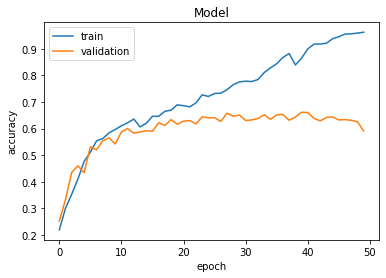

In [63]:
# Membuat grafik progress akurasi dari model
import matplotlib.pyplot as plt

def plot_acc_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("Model")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

plot_acc_hist(history)

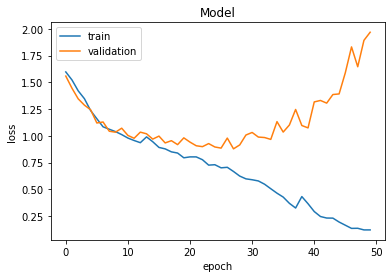

In [64]:
# Membuat grafik progress loss dari model
import matplotlib.pyplot as plt

def plot_loss_hist(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("Model")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

plot_loss_hist(history)

# 7. Testing

In [65]:
from tensorflow import keras

loaded_model = keras.models.load_model('/gdrive/MyDrive/SMS6-Deep_Learning/Week_9/Coding/model/'+nama+'_model.h5')
loaded_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_6 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 56, 56, 16)        5824      
                                                                 
 activation_6 (Activation)   (None, 56, 56, 16)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 28, 28, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 14, 14, 32)        4640      
                                                           

In [66]:
import numpy as np
import pandas as pd

test_ds = image_dataset_from_directory(
    data_dir+"/test",
    validation_split = 0,
    image_size = (width, height),
    batch_size = batch_size,
    label_mode = 'categorical'
)

class_names = test_ds.class_names
print(class_names)

predictions = np.array([])
labels =  np.array([])

for x, y in test_ds:
    predictions = np.concatenate([predictions, np.argmax(loaded_model.predict(x), axis = -1)])
    labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

cf_matrix = tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()

df = pd.DataFrame(cf_matrix, columns = class_names, index = class_names)

Found 4324 files belonging to 5 classes.
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [67]:
df

,daisy,dandelion,rose,sunflower,tulip
daisy,703,41,16,4,5
dandelion,59,970,7,10,6
rose,32,24,689,8,31
sunflower,20,29,8,670,8
tulip,36,34,180,38,696


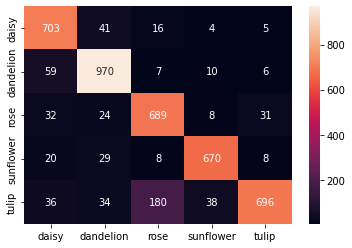

In [68]:
import seaborn as sns
sns.heatmap(df, annot=True,fmt="d")

# 8. Prediction

In [38]:
# Binary
from tensorflow import keras
import tensorflow as tf
import numpy as np

className = ['Cat', 'Dog']

path = "/gdrive/MyDrive/DeepLearning/Coding/Data/dogs-vs-cats_small/predict/dog.jpg"
img = keras.preprocessing.image.load_img(path, target_size = (width, height))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

loaded_model = keras.models.load_model('/gdrive/MyDrive/DeepLearning/Coding/model/'+nama+'_model.h5')
prediction = loaded_model.predict(img_array)

print(className[int(np.rint(np.max(prediction)))])

FileNotFoundError: ignored

In [40]:
# Multiclass
from tensorflow import keras
import tensorflow as tf
import numpy as np

className = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

path = "/gdrive/MyDrive/SMS6-Deep_Learning/Week_9/Coding/Data/flowers/predict/tulip.jpg"
img = keras.preprocessing.image.load_img(path, target_size = (width, height))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

loaded_model = keras.models.load_model('/gdrive/MyDrive/SMS6-Deep_Learning/Week_9/Coding/model/'+nama+'_model.h5')
prediction = loaded_model.predict(img_array)
score = tf.nn.softmax(prediction[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to rose with a 39.60 percent confidence.
